# Approche force brute

Dans ce TP on se propose d’examiner différentes manières de coder et résoudre des problèmes dela classe NP. on s’intéresse au problème du sac à dos. On suppose que l’on dispose de i items ayant chacun une utilité (ou gain) ui. 
<br>Chacun de ces items a un poids mi.
<br>On cherche à maximiser le gain en empaquetant le plus d’items possibles dans un sac de capacité maximaleM.
<br>On distingue deux cas intéressants 
<br>i) les items ne sont disponibles qu’en un seul exemplaire, i.e. on cherche à déterminer la quantité xi∈{0,1} associée à chaque item
<br>ii) on peut prendre plusieurs fois le même item, i.e.xi∈N+. 
<br>Le problème se formalise de la manière suivante :

<br><code>U= max(xi) ∑ixiui(1)
<br>s.c.∑iximi≤M(2)</code> 

<br>On va examiner différentes méthodes pour résoudre ce problème vous permettant de sentir sa complexité. Vous générez pour chaque test que vous ferez un vecteur d’utilité et un vecteur de poids qui seront des entiers tirés aléatoirement dans [1,10].
<br>Vous réglerez M en fonction du nombre d’items possibles, par exemple si vous avez à votre dispositions n items (qui sera un paramètre de votre procédure de test), vous pourrez choisir M= 7n. Vous écrirez une fonction solve_bag pour chaque variante qui prendra les vecteurs d’utilité, de poids et M en paramètres et rendra la valeur max (gain total) atteinte,ainsi que le temps lié au calcul.
<br>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

On ne s’embarasse pas de considérations complexes ici : écrire une méthode qui calcule toutes les combinaisons possible (2n!), les évalue, et renvoie le gain optimal.

In [2]:
# retourne les sommes des valeurs max du tab util ayant l'index des poids choisis
def force_brute1(nb_a_atteindre, tab_poids, tab_util, index):
    if(index==0 or nb_a_atteindre==0):
        return 0
    if(tab_poids[index-1] > nb_a_atteindre):
        return force_brute1(nb_a_atteindre,tab_poids, tab_util, index-1)
    else : 
        return max(tab_util[index-1] + force_brute1(nb_a_atteindre-tab_poids[index-1],tab_poids, tab_util, index-1),
                force_brute1(nb_a_atteindre,tab_poids, tab_util, index-1))

        
N = 10
M = 7 * N
util = [random.randint(1,10) for i in range(0,N)]
poids = [random.randint(1,10) for i in range(0,N)]

print("Poids :      ",poids)
print("Utilitaire : ", util)
print("Force Brute 1 sans répétition : ",force_brute1(M,poids,util,N))


Poids :       [6, 4, 6, 10, 2, 4, 8, 10, 8, 3]
Utilitaire :  [3, 7, 4, 9, 7, 1, 9, 9, 2, 2]
Force Brute 1 sans répétition :  53


même chose mais cette fois ci on peut choisir plusieurs fois le même item. On pourra determiner,pour chaque item la borne max du nombre de fois où on peut choisir cet item comme la partie entière de M/mi. 
Attention, les temps de calcul peuvent devenir très long pour des valeurs de M élevés.

In [3]:
def force_brute2(nb_a_atteindre, tab_poids, tab_util, index, iteration):
    if(index <= 0 or iteration > index):
        return 0
    maxi = 0
    for i in range(index):
        if(nb_a_atteindre - tab_poids[i] >= 0):
            maxi = max(maxi, tab_util[i] + force_brute2(nb_a_atteindre-tab_poids[i], tab_poids,tab_util,index,iteration+1) )
    return maxi
 

print("Poids :      ",poids)
print("Utilitaire : ", util)
print("Force Brute 2 avec répétition : ", force_brute2(7,poids,util,N,0))

Poids :       [6, 4, 6, 10, 2, 4, 8, 10, 8, 3]
Utilitaire :  [3, 7, 4, 9, 7, 1, 9, 9, 2, 2]
Force Brute 2 avec répétition :  21


# Approche gloutonne

On calcule pour chaque objet le rapport gain/masse (ui/mi). On trie les objets par ordre décroissant,puis on remplit le sac dans cet ordre jusqu’à ne plus pouvoir rajouter d’items. Comparer la qualité dela solution obtenue avec celle du solveur exact précédent. Trouvez notamment des cas de figure où la stratégie gloutonne ne donne pas la solution optimale du problème. Ici encore vous coderez deux versionsde la fonction (un seul item disponible et nombre illimité d’items à disposition).

In [4]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs,reverse=True)]   
    return z 

def gloutonne1(nb_a_atteindre, tab_poids, tab_util, index):
    vec = np.asarray(tab_util) / np.asarray(tab_poids)
    new_tab_poids = sort_list(tab_poids, vec)
    new_tab_util = sort_list(tab_util, vec)
    i=0
    gain = 0
    while(nb_a_atteindre > 0 and i < index):
        if(nb_a_atteindre - new_tab_poids[i] >= 0):
            gain += new_tab_util[i]
            nb_a_atteindre -= new_tab_poids[i]
        i += 1 
    return gain

print("Poids :      ", poids)
print("Utilitaire : ", util)
print("Gloutonne sans répétition gain : ", gloutonne1(M,poids,util,N))

Poids :       [6, 4, 6, 10, 2, 4, 8, 10, 8, 3]
Utilitaire :  [3, 7, 4, 9, 7, 1, 9, 9, 2, 2]
Gloutonne sans répétition gain :  53


In [5]:
def gloutonne2(nb_a_atteindre, tab_poids, tab_util, index,iteration):
    vec = np.asarray(tab_util) / np.asarray(tab_poids)
    new_tab_poids = sort_list(tab_poids, vec)
    new_tab_util = sort_list(tab_util, vec)
    gain = 0
    for i in range(index):
        if(nb_a_atteindre - new_tab_poids[i] >= 0):
            gain = max(gain, new_tab_util[i] + gloutonne2(nb_a_atteindre- new_tab_poids[i], tab_poids, tab_util, index,iteration+1) )
    return gain


print("Poids :      ", poids)
print("Utilitaire : ", util)
print("Gloutonne avec répétition gain : ", gloutonne2(5,poids,util,N,0)) # trop long si on remplace 5 par M

Poids :       [6, 4, 6, 10, 2, 4, 8, 10, 8, 3]
Utilitaire :  [3, 7, 4, 9, 7, 1, 9, 9, 2, 2]
Gloutonne avec répétition gain :  14


# Programmation dynamique

On se limite ici au cas où un seul item de chaque objet est disponible.L’idée de la programmation dynamique est de résoudre incrémentalement des versions plus simples du problème, et de stocker des résultats intermédiaires nécessaires pour ajouter de nouvelles variables. <br> On réalise alors un compromis temps/espace. Dans le cas du problème du sac à dos, le problème est dit à sous-structure optimale, c’est à dire qu’on peut trouver la valeur optimale du problème à i variable à 1
partir de la valeur optimale à i−1 variables. On définit par récurrence la quantité P(k, m) suivante, décrivant l’état du système pour k variables : P(k, m)  =max xik∑ixiui(3)s.c.∑iximi≤m(4)alors la solution optimale est soit :1. la solution optimaleP(k−1, m) où l’on choisit de ne pas rajouter l’item, i.e.xk= 02. la solution optimaleP(k−1, m−mk) +ukoù l’on choisit de rajouter l’item, i.e.xk= 1Il suffit alors de construire un tableau des différentes possibilitésP(k, m). Une fois ce tableau construit, il suffit de partir de la case P(k, M)et de remonter à la case P(0, .)pour savoir si l’on choisit l’item ou non et construire ainsi la solution. On note alors que la complexité de l’algorithme est en temps et en espace o(nM). Bien que d’allure polynomiale, on n’a pas montré que P=N P: le codage de M se faisant sur log(M) bits, on reste bien en complexité exponentielle de la taille de l’entrée. Coder et tester cet algorithme.

In [6]:
def dynamique(nb_a_atteindre, tab_poids, tab_util, index):
    P = [[0 for x in range(nb_a_atteindre+1)] for x in range(index+1)] 
    for i in range(index+1): 
        for j in range(nb_a_atteindre+1): 
            if i==0 or j==0: 
                P[i][j] = 0
            elif tab_poids[i-1] <= j: 
                P[i][j] = max(P[i-1][j], tab_util[i-1] + P[i-1][j-tab_poids[i-1]]) 
            else: 
                P[i][j] = P[i-1][j] 
    return P[index][nb_a_atteindre]

print("Poids :      ", poids)
print("Utilitaire : ", util)
print("Dynamique : ", dynamique(M, poids, util, N))

Poids :       [6, 4, 6, 10, 2, 4, 8, 10, 8, 3]
Utilitaire :  [3, 7, 4, 9, 7, 1, 9, 9, 2, 2]
Dynamique :  53


# Bilan

Pour chaque méthode, faire varier le nombre d’items N, et mesurez un temps moyen pris sur 10 résolution du problème. Tracez les courbes de temps d’exécution moyen correspondantes pour les 3 méthodes dans les 2 cas de figure (une seule ou plusieurs fois le même item, où on n’exclura la programmation dynamique).

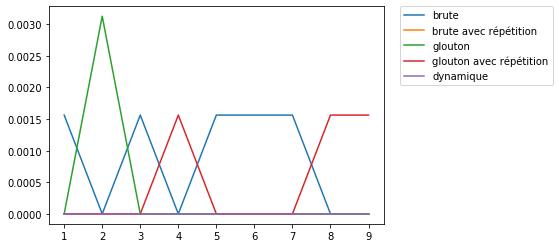

In [16]:
plt.figure()
bruteforce1_courbe=[]
bruteforce2_courbe=[]
gloutonne1_courbe=[]
gloutonne2_courbe=[]
dynamique_courbe=[]
for i in range(1,N):
    moy_bruteforce1 = 0
    moy_bruteforce2 = 0
    moy_gloutonne1  = 0
    moy_gloutonne2  = 0
    moy_dynamique   = 0
    for j in range(10):

        t = time.process_time()
        force_brute1(M,poids,util,N)
        t2 = time.process_time()
        moy_bruteforce1+=t2-t

        t = time.process_time()
        force_brute2(i,poids,util,N,0)
        t2 = time.process_time()
        moy_bruteforce2+=t2-t

        t = time.process_time()
        gloutonne1(i,poids,util,N)
        t2 = time.process_time()
        moy_gloutonne1+=t2-t

        t = time.process_time()
        gloutonne2(i,poids,util,N,0)
        t2 = time.process_time()
        moy_gloutonne2+=t2-t

        t = time.process_time()
        dynamique(i, poids, util, N)
        t2 = time.process_time()
        moy_dynamique+= t2-t

    bruteforce1_courbe.append(moy_bruteforce1 / 10)
    bruteforce2_courbe.append(moy_bruteforce2 / 10)
    gloutonne1_courbe.append(moy_gloutonne1 / 10)
    gloutonne2_courbe.append(moy_gloutonne2 / 10)
    dynamique_courbe.append(moy_dynamique / 10)

plt.plot(np.arange(1,N), bruteforce1_courbe,label="brute")
plt.plot(np.arange(1,N), bruteforce2_courbe,label="brute avec répétition")
plt.plot(np.arange(1,N), gloutonne1_courbe,label="glouton")
plt.plot(np.arange(1,N), gloutonne2_courbe,label="glouton avec répétition")
plt.plot(np.arange(1,N), dynamique_courbe,label="dynamique")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()   